<a href="https://colab.research.google.com/github/epiloksaachdan/ByuWarmUpProc/blob/master/MachineLearning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama** : Gisela Yunanda

**NIM** : 1301184462

**Kelas**: IF-42-07

**a. formulasi masalah**

untuk memprediksi apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak berdasarkan data pelanggan yang terdata di dealer. 

**b. eksplorasi dan persiapan data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [ ]:
#load the kendaraan_test & kendaraan_train file into a dataframe
df = pd.read_csv('kendaraan_train.csv')
df_test = pd.read_csv('kendaraan_test.csv')
print(df)

            id Jenis_Kelamin  ...  Lama_Berlangganan  Tertarik
0            1        Wanita  ...               97.0         0
1            2          Pria  ...              158.0         0
2            3           NaN  ...              119.0         0
3            4        Wanita  ...               63.0         0
4            5          Pria  ...              194.0         0
...        ...           ...  ...                ...       ...
285826  285827        Wanita  ...              217.0         0
285827  285828        Wanita  ...               50.0         0
285828  285829        Wanita  ...              226.0         0
285829  285830          Pria  ...              270.0         0
285830  285831          Pria  ...               44.0         0

[285831 rows x 12 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
missing_data = df.isnull()
missing_data.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

id
False    285831
Name: id, dtype: int64

Jenis_Kelamin
False    271391
True      14440
Name: Jenis_Kelamin, dtype: int64

Umur
False    271617
True      14214
Name: Umur, dtype: int64

SIM
False    271427
True      14404
Name: SIM, dtype: int64

Kode_Daerah
False    271525
True      14306
Name: Kode_Daerah, dtype: int64

Sudah_Asuransi
False    271602
True      14229
Name: Sudah_Asuransi, dtype: int64

Umur_Kendaraan
False    271556
True      14275
Name: Umur_Kendaraan, dtype: int64

Kendaraan_Rusak
False    271643
True      14188
Name: Kendaraan_Rusak, dtype: int64

Premi
False    271262
True      14569
Name: Premi, dtype: int64

Kanal_Penjualan
False    271532
True      14299
Name: Kanal_Penjualan, dtype: int64

Lama_Berlangganan
False    271839
True      13992
Name: Lama_Berlangganan, dtype: int64

Tertarik
False    285831
Name: Tertarik, dtype: int64



*jenis kelamin*

In [ ]:
#ubah value jenis kelamin
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].map({'Pria': 0,'Wanita': 1})

In [ ]:
#replace nan with avg
avg_jk = df['Jenis_Kelamin'].astype('float').mean(axis=0)
df['Jenis_Kelamin'].replace(np.nan, avg_jk, inplace= True)

In [ ]:
#ubah dtype jenis kelamin float to int
df['Jenis_Kelamin'] = df['Jenis_  Kelamin'].apply(np.int64)

*umur* *kendaraan*

In [ ]:
#ubah value umur kendaraan
df['Umur_Kendaraan'] = df['Umur_Kendaraan'].map({'< 1 Tahun': 0,'1-2 Tahun': 1, '> 2 Tahun':2})

In [ ]:
df['Umur_Kendaraan'].unique() #cek cm ada 3 jenis data

array([ 0.,  2.,  1., nan])

In [ ]:
#replace nan with avg
avg_uk = df['Umur_Kendaraan'].astype('float').mean(axis=0)
df['Umur_Kendaraan'].replace(np.nan, avg_uk, inplace= True)

In [ ]:
#ubah dtype umur kendaraan float to int
df['Umur_Kendaraan'] = df['Umur_Kendaraan'].apply(np.int64)

*kendaraan rusak*

In [ ]:
#ubah value kendaraan rusak
df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].map({'Tidak': 0,'Pernah': 1})

In [ ]:
#replace nan with avg
avg_kr = df['Kendaraan_Rusak'].astype('float').mean(axis=0)
df['Kendaraan_Rusak'].replace(np.nan, avg_kr, inplace= True)

In [ ]:
#ubah dtype kendaraan rusak float to int
df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].apply(np.int64)

In [ ]:
#ganti tipe data object ke float

avg_umur = df['Umur'].astype('float').mean(axis=0)
df['Umur'].replace(np.nan, avg_umur, inplace= True)

df['SIM'].replace(np.nan, 1.0, inplace= True)

avg_kd = df['Kode_Daerah'].astype('float').mean(axis=0)
df['Kode_Daerah'].replace(np.nan, avg_kd, inplace= True)

avg_sa = df['Sudah_Asuransi'].astype('float').mean(axis=0)
df['Sudah_Asuransi'].replace(np.nan, avg_sa, inplace= True)

avg_premi = df['Premi'].astype('float').mean(axis=0)
df['Premi'].replace(np.nan, avg_premi, inplace= True)

avg_kp = df['Kanal_Penjualan'].astype('float').mean(axis=0)
df['Kanal_Penjualan'].replace(np.nan, avg_kp, inplace= True)

avg_lb = df['Lama_Berlangganan'].astype('float').mean(axis=0)
df['Lama_Berlangganan'].replace(np.nan, avg_lb, inplace= True)

*test*

In [ ]:
#ubah value jenis kelamin data test
df_test['Jenis_Kelamin'] = df_test['Jenis_Kelamin'].map({'Pria': 0,'Wanita': 1})

In [ ]:
#ubah value umur kendaraan
df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].map({'< 1 Tahun': 0,'1-2 Tahun': 1, '> 2 Tahun':2})

In [ ]:
#ubah value kendaraan rusak
df_test['Kendaraan_Rusak'] = df_test['Kendaraan_Rusak'].map({'Tidak': 0,'Pernah': 1})

In [ ]:
df[['Umur_Kendaraan']] = df[['Umur_Kendaraan']].astype('float')
df[['Kendaraan_Rusak']] = df[['Kendaraan_Rusak']].astype('float')
df[['Jenis_Kelamin']] = df[['Jenis_Kelamin']].astype('float')

In [ ]:
df_test[['Umur']] = df_test[['Umur']].astype('float')
df_test[['SIM']] = df_test[['SIM']].astype('float')
df_test[['Kode_Daerah']] = df_test[['Kode_Daerah']].astype('float')
df_test[['Sudah_Asuransi']] = df_test[['Sudah_Asuransi']].astype('float')
df_test[['Premi']] = df_test[['Premi']].astype('float')
df_test[['Kanal_Penjualan']] = df_test[['Kanal_Penjualan']].astype('float')
df_test[['Lama_Berlangganan']] = df_test[['Lama_Berlangganan']].astype('float')
df_test[['Tertarik']] = df_test[['Tertarik']].astype('float')
df_test[['Jenis_Kelamin']] = df_test[['Jenis_Kelamin']].astype('float')
df_test[['Umur_Kendaraan']] = df_test[['Umur_Kendaraan']].astype('float')
df_test[['Kendaraan_Rusak']] = df_test[['Kendaraan_Rusak']].astype('float')

In [ ]:
print(df.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      285831 non-null  float64
 2   Umur               285831 non-null  float64
 3   SIM                285831 non-null  float64
 4   Kode_Daerah        285831 non-null  float64
 5   Sudah_Asuransi     285831 non-null  float64
 6   Umur_Kendaraan     285831 non-null  float64
 7   Kendaraan_Rusak    285831 non-null  float64
 8   Premi              285831 non-null  float64
 9   Kanal_Penjualan    285831 non-null  float64
 10  Lama_Berlangganan  285831 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 26.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Coun

*correlation*

In [ ]:
#correlation check 
df_corr = df.corr()
df_corr

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001226,0.001686,-0.002603,0.002060,-0.002966,0.002627,0.002351,0.002233,-0.001462,0.000890,0.000972
Jenis_Kelamin,0.001226,1.000000,-0.135939,0.015906,-0.001444,0.075725,-0.146424,-0.083964,-0.004290,0.106507,0.001275,-0.051317
Umur,0.001686,-0.135939,1.000000,-0.075196,0.041433,-0.242319,0.707305,0.249142,0.061275,-0.548758,0.000140,0.107147
SIM,-0.002603,0.015906,-0.075196,1.000000,-0.003156,0.015206,-0.032779,-0.017034,-0.010704,0.041133,-0.001200,0.009341
Kode_Daerah,0.002060,-0.001444,0.041433,-0.003156,1.000000,-0.023296,0.040403,0.026031,-0.011278,-0.041044,-0.003460,0.009931
Sudah_Asuransi,-0.002966,0.075725,-0.242319,0.015206,-0.023296,1.000000,-0.351083,-0.764128,0.005609,0.210739,0.002621,-0.331952
Umur_Kendaraan,0.002627,-0.146424,0.707305,-0.032779,0.040403,-0.351083,1.000000,0.356791,0.035352,-0.507904,-0.002089,0.210051
Kendaraan_Rusak,0.002351,-0.083964,0.249142,-0.017034,0.026031,-0.764128,0.356791,1.000000,0.007964,-0.209337,-0.002359,0.337156
Premi,0.002233,-0.004290,0.061275,-0.010704,-0.011278,0.005609,0.035352,0.007964,1.000000,-0.106468,-0.000710,0.023136
Kanal_Penjualan,-0.001462,0.106507,-0.548758,0.041133,-0.041044,0.210739,-0.507904,-0.209337,-0.106468,1.000000,0.000311,-0.137412


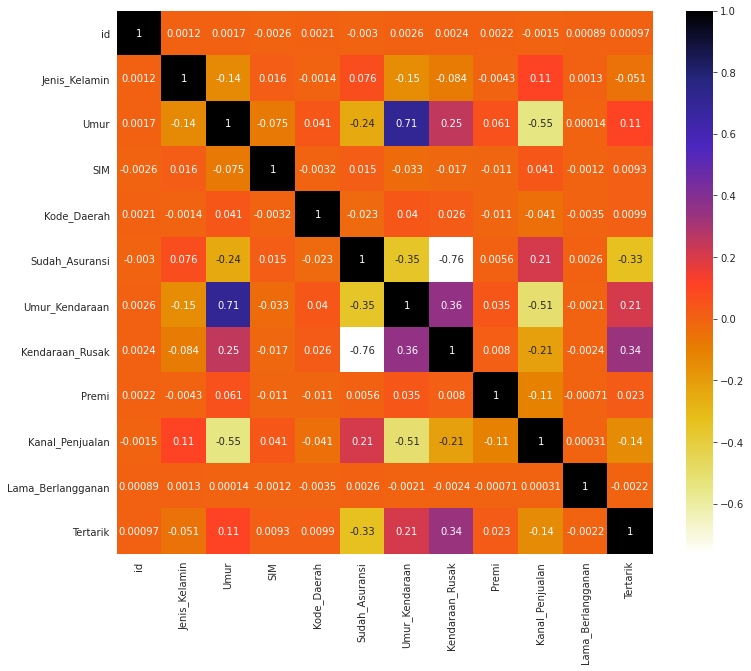

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

2

In [ ]:
corr_features

{'Kendaraan_Rusak', 'Umur_Kendaraan'}

In [ ]:
df_new = df.drop(corr_features,axis=1)

In [ ]:
#correlation check 
df_corr = df_new.corr()
df_corr

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001226,0.001686,-0.002603,0.002060,-0.002966,0.002233,-0.001462,0.000890,0.000972
Jenis_Kelamin,0.001226,1.000000,-0.135939,0.015906,-0.001444,0.075725,-0.004290,0.106507,0.001275,-0.051317
Umur,0.001686,-0.135939,1.000000,-0.075196,0.041433,-0.242319,0.061275,-0.548758,0.000140,0.107147
SIM,-0.002603,0.015906,-0.075196,1.000000,-0.003156,0.015206,-0.010704,0.041133,-0.001200,0.009341
Kode_Daerah,0.002060,-0.001444,0.041433,-0.003156,1.000000,-0.023296,-0.011278,-0.041044,-0.003460,0.009931
Sudah_Asuransi,-0.002966,0.075725,-0.242319,0.015206,-0.023296,1.000000,0.005609,0.210739,0.002621,-0.331952
Premi,0.002233,-0.004290,0.061275,-0.010704,-0.011278,0.005609,1.000000,-0.106468,-0.000710,0.023136
Kanal_Penjualan,-0.001462,0.106507,-0.548758,0.041133,-0.041044,0.210739,-0.106468,1.000000,0.000311,-0.137412
Lama_Berlangganan,0.000890,0.001275,0.000140,-0.001200,-0.003460,0.002621,-0.000710,0.000311,1.000000,-0.002168
Tertarik,0.000972,-0.051317,0.107147,0.009341,0.009931,-0.331952,0.023136,-0.137412,-0.002168,1.000000


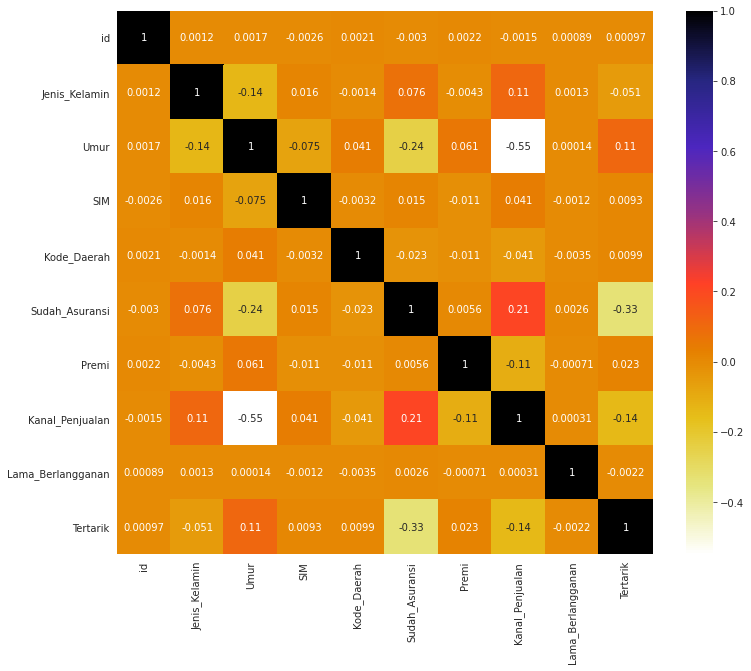

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

*elbow method*

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [ ]:
#df to array

arr_u= df["Umur"].to_numpy()
arr_p = df["Premi"].to_numpy()

In [ ]:
#create the data

x = np.array(list(zip(arr_u, arr_p))).reshape(len(arr_u),2)

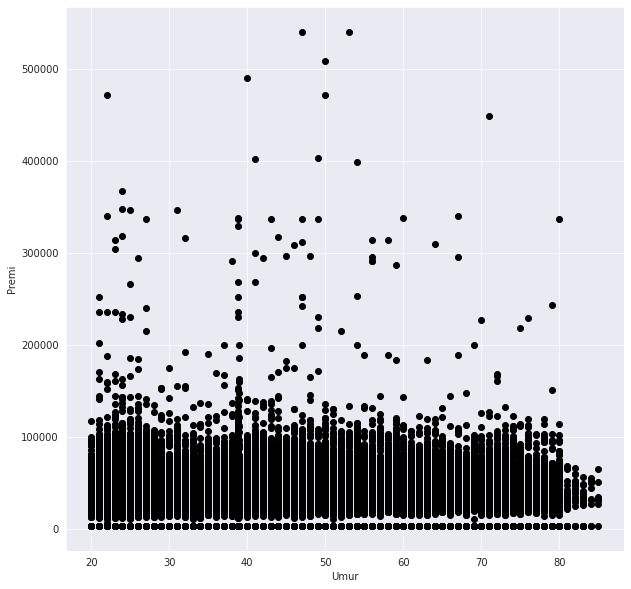

In [ ]:
x = df[["Umur","Premi"]]
#visualisasi
plt.scatter(x["Umur"],x["Premi"],c='black')
plt.xlabel('Umur')
plt.ylabel('Premi')
plt.show()

**c. pemodelan**

In [ ]:
#build cluster model & calculate the values of distortion

distortions = []
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(x)
	kmeanModel.fit(x)
 
	distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / x.shape[0])
	

In [ ]:
for key, val in mapping1.items():
	print(f'{key} : {val}')

1 : 47.82492114620073
2 : 17.657161270359314
3 : 9.75016004008098
4 : 8.670751767686221
5 : 7.679195770241155
6 : 6.525380459020932
7 : 6.335106268948944
8 : 5.889932758242641
9 : 5.497084784581556


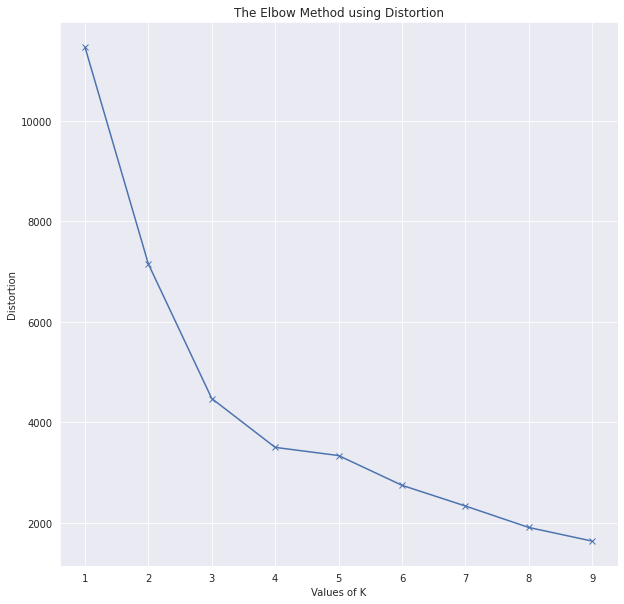

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

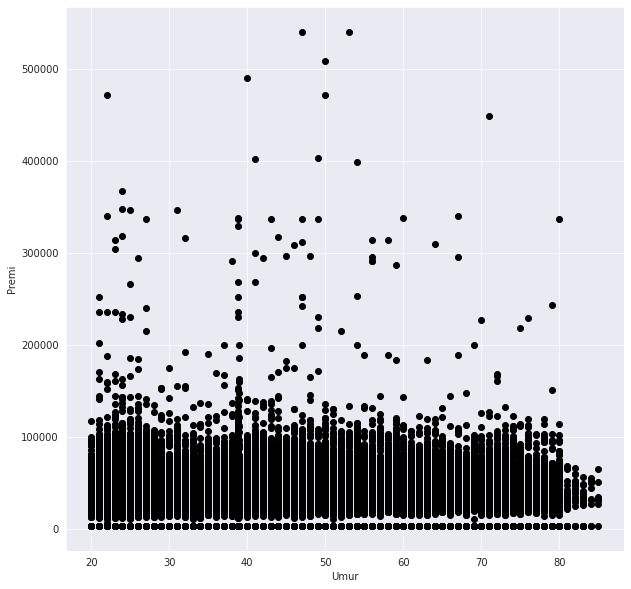

In [ ]:
x = df[["Umur","Premi"]]
#visualisasi
plt.scatter(x["Umur"],x["Premi"],c='black')
plt.xlabel('Umur')
plt.ylabel('Premi')
plt.show()

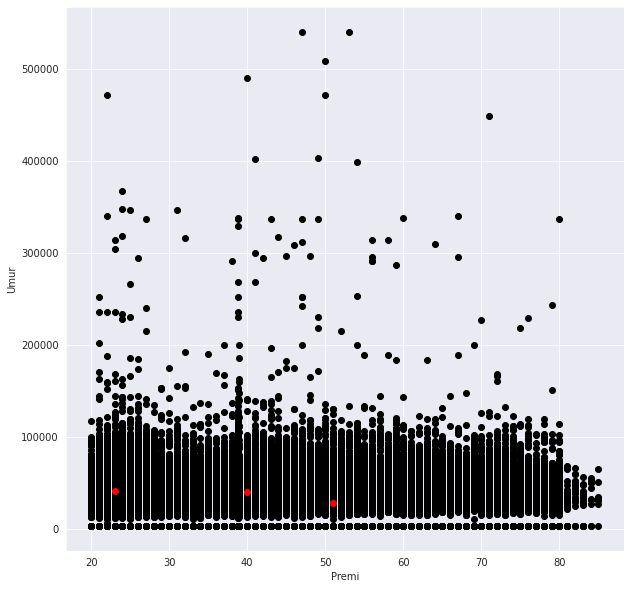

In [ ]:
k = 3
#select random centroid
centroid = (x.sample(n=k))
plt.scatter(x["Umur"],x["Premi"],c='black')
plt.scatter(centroid["Umur"],centroid["Premi"],c='red')
plt.xlabel('Premi')
plt.ylabel('Umur')
plt.show()

In [ ]:
def jarak (titik,centroid):
  d1=(titik["Premi"]-centroid["Premi"])**2
  d2=(titik["Umur"]-centroid["Umur"])**2
  d=np.sqrt(d1+d2)
  return d

**d. evaluasi**

**e. eksperimen**

In [ ]:
diff = 1
j=0

while(diff!=0):
    xd=x
    i=1
    for index1,row_c in centroid.iterrows():
        ed=[]
        for index2,row_d in xd.iterrows():
            d = jarak(row_c, row_d)
            ed.append(d)
        x[i]=ed
        i=i+1

    c=[]
    for index,row in x.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        c.append(pos)
    x["Cluster"]=c
    centroid_new = x.groupby(["Cluster"]).mean()[["Umur","Premi"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (centroid_new['Umur'] - centroid['Umur']).sum() + (centroid_new['Premi'] - centroid['Premi']).sum()
        print(diff.sum())
    centroid = x.groupby(["Cluster"]).mean()[["Umur","Premi"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-4057.1045885194903
-5933.835599157997
-5826.727270503836
-3038.827513964464
-1225.3499803259829
-680.7314648968583
-428.32023999311485
-291.6071791031271
-186.59115352732158
-129.0479094877491
-85.28336345386481
-57.79906818068044
-43.09260834760806
-37.83181502142588
-24.8212291120019
-18.2717423914142
-14.810833389800827
-10.582223417821012
-7.006443986274348
-4.832833084007937
-5.984088365917678
-1.7838424035691531
-0.5091571723396129
-2.5473637215104787
-1.7824335184934128
-0.7635990740532606
0.0


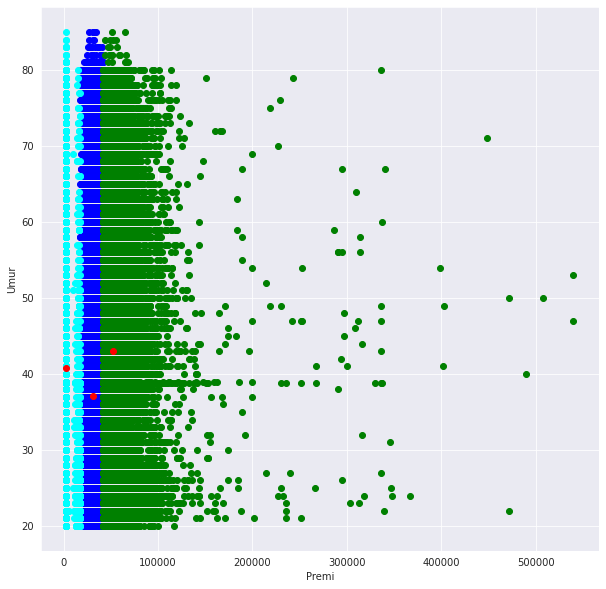

In [ ]:
color=['blue','green','cyan']
for k in range(3):
    df=x[x["Cluster"]==k+1]
    plt.scatter(df["Premi"],df["Umur"],c=color[k])
plt.scatter(centroid["Premi"],centroid["Umur"],c='red')
plt.xlabel('Premi')
plt.ylabel('Umur')
plt.show()